# CMSC 394 survey data analysis NEW
## Christian Roncal

# Dependencies

In [53]:
import pandas as pd
import numpy as np

# Load and clean up the data

In [54]:
df = pd.read_csv('surveyresponses.csv')

In [55]:
df.head()

,Timestamp,Did you graduate from a highschool under the Prince George's County Public Schools system?,What year do you expect to receive your bachelors (if in combined BS/MS programs when did you finish your undergrad requirements)?,What year did you graduate from high school?,How many summer semesters have you taken?,What was your high school GPA?,What is your first semester college GPA?,"How many ""pre-requisite classes"" did you have to take? e.g. (Math115 - Precalculus to take Math140 - Calculus 1)",How many times have you switched majors?,Answer whether you agree/disagree with the following statements [I wasn't sure what I will do after high school],Answer whether you agree/disagree with the following statements [I felt uninterested in my high school coursework],Answer whether you agree/disagree with the following statements [My high school informed me about the military career path],Answer whether you agree/disagree with the following statements [My high school informed me about vocational career paths],Answer whether you agree/disagree with the following statements [My high school informed me about IT certifications]
0,4/24/2019 23:28:18,Yes,Spring 2019,2015,3,3.500,3.800,3,0,Disagree,Agree,Disagree,Disagree,Disagree
1,4/24/2019 23:33:04,No,Spring 2020,2017,1,3.760,3.947,0,0,Agree,Agree,Disagree,Disagree,Disagree
2,4/24/2019 23:34:46,No,Spring 2020,2016,4,4.778,2.987,0,1,Agree,Agree,Agree,Agree,Agree
3,4/24/2019 23:35:23,No,Spring 2020,2015,0,3.700,3.900,3,0,Agree,Agree,Disagree,Agree,Agree
4,4/24/2019 23:37:05,No,Spring 2020,2016,0,3.750,3.750,2,1,Agree,Agree,Disagree,Agree,Disagree


### Rename columns
1. pg - graduated from pgcps 1/0 (yes/no)
1. cgrad -college grad year semester
1. hsgrad - hs grad year
1. nsummer - number of summer semesters
1. nremedial - number of "prereq classes"
1. hsgpa - hs gpa
1. cgpa - first semester college gpa
1. nswitch - number of major switches
1. unsure - unsure of college plans
1. uninterested - unintersted in hs schoolwork
1. mil - military path known
1. voc - vocational path known
1. it - it path known

In [56]:
df.columns = ['timestamp', 'pg', 'cgrad', 'hsgrad', 'nsummer', 'hsgpa', 'cgpa', 'nremedial', 'nswitch', 'unsure', 'uninterested', 'mil', 'voc', 'it']

In [57]:
df = df.drop(columns='timestamp')
df.head()

,pg,cgrad,hsgrad,nsummer,hsgpa,cgpa,nremedial,nswitch,unsure,uninterested,mil,voc,it
0,Yes,Spring 2019,2015,3,3.500,3.800,3,0,Disagree,Agree,Disagree,Disagree,Disagree
1,No,Spring 2020,2017,1,3.760,3.947,0,0,Agree,Agree,Disagree,Disagree,Disagree
2,No,Spring 2020,2016,4,4.778,2.987,0,1,Agree,Agree,Agree,Agree,Agree
3,No,Spring 2020,2015,0,3.700,3.900,3,0,Agree,Agree,Disagree,Agree,Agree
4,No,Spring 2020,2016,0,3.750,3.750,2,1,Agree,Agree,Disagree,Agree,Disagree


### Fill in NaNs and numericalize

In [58]:
df = df.fillna('') # replaces all NaNs with empty string

### Numericalize

It's easier to deal with numbers when computationally analyzing data so let's only deal with numbers

In [59]:
agree_map = {'Yes': 1, 'No': 0, 'Agree':1, 'Disagree':0}
def numericalize(x):
    try:
        return agree_map[x]
    except:
        print('errorrrr')
        print(x)

In [60]:
col_names = ['pg', 'unsure', 'uninterested', 'mil', 'voc', 'it']
df[col_names].head()

,pg,unsure,uninterested,mil,voc,it
0,Yes,Disagree,Agree,Disagree,Disagree,Disagree
1,No,Agree,Agree,Disagree,Disagree,Disagree
2,No,Agree,Agree,Agree,Agree,Agree
3,No,Agree,Agree,Disagree,Agree,Agree
4,No,Agree,Agree,Disagree,Agree,Disagree


In [61]:
for col in col_names:
    df[col] = df[col].apply(numericalize)

In [62]:
df.head()

,pg,cgrad,hsgrad,nsummer,hsgpa,cgpa,nremedial,nswitch,unsure,uninterested,mil,voc,it
0,1,Spring 2019,2015,3,3.500,3.800,3,0,0,1,0,0,0
1,0,Spring 2020,2017,1,3.760,3.947,0,0,1,1,0,0,0
2,0,Spring 2020,2016,4,4.778,2.987,0,1,1,1,1,1,1
3,0,Spring 2020,2015,0,3.700,3.900,3,0,1,1,0,1,1
4,0,Spring 2020,2016,0,3.750,3.750,2,1,1,1,0,1,0


### Creating new features

nsems = (grad year - hs grad year)*2 + 1 (if fall) + nsummer

In [63]:
def nsems(x):
    szn, year = x['cgrad'].split()
    year = int(year)
    fallszn = False if szn == 'Spring' else True
    
    res = (year - x['hsgrad'])* 2 + x['nsummer']
    res += 1 if fallszn else 0
    return res

In [64]:
df['nsems'] = df.apply(nsems, axis=1)

In [65]:
df.head()

,pg,cgrad,hsgrad,nsummer,hsgpa,cgpa,nremedial,nswitch,unsure,uninterested,mil,voc,it,nsems
0,1,Spring 2019,2015,3,3.500,3.800,3,0,0,1,0,0,0,11
1,0,Spring 2020,2017,1,3.760,3.947,0,0,1,1,0,0,0,7
2,0,Spring 2020,2016,4,4.778,2.987,0,1,1,1,1,1,1,12
3,0,Spring 2020,2015,0,3.700,3.900,3,0,1,1,0,1,1,10
4,0,Spring 2020,2016,0,3.750,3.750,2,1,1,1,0,1,0,8


alt score = "degree of college alternative knowledge (ie number of alternative paths shown)" $\sum [\text{unintersted, mil, voc}]$

In [66]:
def altscore(x):
    return x['mil'] + x['voc'] + x['it']

In [67]:
df['altscore'] = df.apply(altscore, axis=1)

In [68]:
df.head()

,pg,cgrad,hsgrad,nsummer,hsgpa,cgpa,nremedial,nswitch,unsure,uninterested,mil,voc,it,nsems,altscore
0,1,Spring 2019,2015,3,3.500,3.800,3,0,0,1,0,0,0,11,0
1,0,Spring 2020,2017,1,3.760,3.947,0,0,1,1,0,0,0,7,0
2,0,Spring 2020,2016,4,4.778,2.987,0,1,1,1,1,1,1,12,3
3,0,Spring 2020,2015,0,3.700,3.900,3,0,1,1,0,1,1,10,2
4,0,Spring 2020,2016,0,3.750,3.750,2,1,1,1,0,1,0,8,1


In [69]:
df.to_csv('num_394.csv', index=False)

In [70]:
t = pd.read_csv('num_394.csv')
len(t)

50

In [71]:
df_clean = df.drop(columns=['cgrad', 'hsgrad', 'nsummer'])
df_clean.head()

,pg,hsgpa,cgpa,nremedial,nswitch,unsure,uninterested,mil,voc,it,nsems,altscore
0,1,3.500,3.800,3,0,0,1,0,0,0,11,0
1,0,3.760,3.947,0,0,1,1,0,0,0,7,0
2,0,4.778,2.987,0,1,1,1,1,1,1,12,3
3,0,3.700,3.900,3,0,1,1,0,1,1,10,2
4,0,3.750,3.750,2,1,1,1,0,1,0,8,1


In [72]:
df_clean.to_csv('394clean.csv', index=False)

In [73]:
pg_df = df.loc[df['pg'] == 1]

In [74]:
len(pg_df.loc[pg_df['nswitch'] > 0])

19

In [75]:
len(pg_df)

25

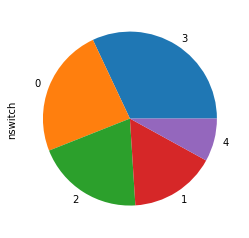

In [76]:
nswitch_pg = pg_df['nswitch'].value_counts().plot.pie().get_figure()
nswitch_pg.savefig('switchpgpie.png')

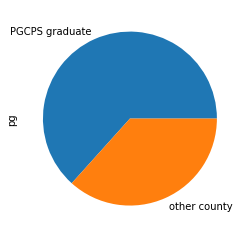

In [77]:
pgswitchpie = df.loc[df['nswitch'] > 0]['pg'].apply(lambda x: "PGCPS graduate" if x == 1 else "other county").value_counts().plot.pie().get_figure()

In [78]:
pgswitchpie.savefig('pgvsothersswitches.png')

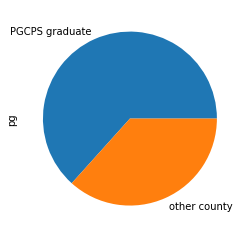

In [79]:
pgswitchpie

In [80]:
19/30

0.6333333333333333

Want: bar graph comparing average number of semesters

yes/no for switching majors, remedial classes, unsure

In [81]:
df = df_clean[['unsure', 'nremedial', 'nswitch', 'altscore', 'nsems', 'cgpa']]

In [82]:
df.head()

,unsure,nremedial,nswitch,altscore,nsems,cgpa
0,0,3,0,0,11,3.800
1,1,0,0,0,7,3.947
2,1,0,1,3,12,2.987
3,1,3,0,2,10,3.900
4,1,2,1,1,8,3.750


In [83]:
nsems_unsure1 = df.loc[df['unsure'] == 1]['nsems'].mean()
nsems_unsure1

11.833333333333334

In [84]:
nsems_unsure0 = df.loc[df['unsure'] == 0]['nsems'].mean()
nsems_unsure0

8.5

In [85]:
def addtodict(d, c, yn):
    d['class'].append(c)
    d['yesno'].append('yes' if yn == 1 else 'no')
    d['avgsems'].append(df.loc[df[col] == yn]['nsems'].mean())

In [86]:

dfprime = {'class': [], 'yesno':[], 'avgsems':[]}
for col in ['unsure', 'nremedial', 'nswitch']:
    addtodict(dfprime, col, 0)
    addtodict(dfprime, col, 1)

In [87]:
dfprime

{'class': ['unsure', 'unsure', 'nremedial', 'nremedial', 'nswitch', 'nswitch'],
 'yesno': ['no', 'yes', 'no', 'yes', 'no', 'yes'],
 'avgsems': [8.5, 11.833333333333334, 8.5, 10.833333333333334, 9.95, 10.7]}

In [88]:
dfviz = pd.DataFrame({'yesno':dfprime['yesno'], 'avgsems': dfprime['avgsems']}, index=dfprime['class'])

In [89]:
dfviz.head()

,yesno,avgsems
unsure,no,8.500000
unsure,yes,11.833333
nremedial,no,8.500000
nremedial,yes,10.833333
nswitch,no,9.950000


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

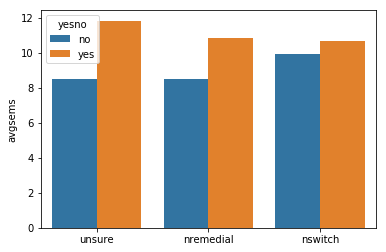

In [91]:
ax = sns.barplot(x=dfviz.index, y=dfviz.avgsems, hue=dfviz.yesno)

In [47]:
ax.get_figure().savefig('unsurebplot.png')